# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [24]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\iced2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

In [36]:
# Create a newsapi client
newsapi = NewsApiClient(api_key='583634747abd483fb28606d4ca216598')

In [37]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')
btc_articles['totalResults']

7540

In [38]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')
eth_articles['totalResults']

2259

In [40]:
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df


In [41]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and..."
1,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...
2,-0.6124,0.143,0.857,0.000,image copyrightGetty Images\r\nThe gang behind...
3,0.6240,0.000,0.873,0.127,To get a roundup of TechCrunchs biggest and mo...
4,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...
5,0.4939,0.000,0.873,0.127,"As longtime TechCrunch readers know well, Mich..."
6,0.0000,0.000,1.000,0.000,A representation of virtual currency Bitcoin i...
7,0.0000,0.000,1.000,0.000,A representation of the virtual cryptocurrency...
8,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...
9,-0.4767,0.088,0.912,0.000,James Martin/CNET\r\nA UK man was arrested in ...


In [42]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.3612,0.000,0.925,0.075,There are many blockchain platforms competing ...
1,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...
2,0.3612,0.041,0.849,0.110,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...
3,0.6369,0.000,0.843,0.157,"""Anthony Di Iorio, a co-founder of the Ethereu..."
4,0.7717,0.000,0.806,0.194,"Ether holders have ""staked"" more than $13 bill..."
5,0.6249,0.000,0.850,0.150,Ether is the cryptocurrency of the ethereum ne...
6,0.4019,0.000,0.920,0.080,Major upgrades to the ethereum network could h...
7,0.4939,0.000,0.914,0.086,You’ve likely seen the headlines surrounding t...
8,0.0000,0.000,1.000,0.000,While the ambitions of crypto investors have s...
9,0.5346,0.000,0.842,0.158,Personal Finance Insider writes about products...


In [43]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()


,Compound,Negative,Neutral,Positive
count,20.00000,20.000000,20.000000,20.000000
mean,-0.02333,0.043100,0.914000,0.042900
std,0.43497,0.079494,0.102502,0.064167
min,-0.82710,0.000000,0.653000,0.000000
25%,-0.38180,0.000000,0.869000,0.000000
50%,0.00000,0.000000,0.920000,0.000000
75%,0.06250,0.080000,1.000000,0.096000
max,0.72640,0.287000,1.000000,0.178000


In [44]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()


,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.246290,0.016850,0.910850,0.072300
std,0.347153,0.030824,0.078249,0.072891
min,-0.381800,0.000000,0.782000,0.000000
25%,0.000000,0.000000,0.842750,0.000000
50%,0.305600,0.000000,0.920000,0.077500
75%,0.528675,0.010250,1.000000,0.149250
max,0.771700,0.080000,1.000000,0.194000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [45]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [46]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

In [47]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean.lower())
    
    # Convert the words to lowercase and Remove the stop words
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize Words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
    
    return root_words

In [50]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df.head(10)

,Compound,Negative,Neutral,Positive,content,tokens
0,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and...","[like, dogecoin, devotee, mayor, reno, leader,..."
1,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...,"[filed, underthe, supply, chain, attack, reach..."
2,-0.6124,0.143,0.857,0.000,image copyrightGetty Images\r\nThe gang behind...,"[image, copyrightgetty, imagesthe, gang, behin..."
3,0.6240,0.000,0.873,0.127,To get a roundup of TechCrunchs biggest and mo...,"[get, roundup, techcrunchs, biggest, important..."
4,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
5,0.4939,0.000,0.873,0.127,"As longtime TechCrunch readers know well, Mich...","[longtime, techcrunch, reader, know, well, mic..."
6,0.0000,0.000,1.000,0.000,A representation of virtual currency Bitcoin i...,"[representation, virtual, currency, bitcoin, s..."
7,0.0000,0.000,1.000,0.000,A representation of the virtual cryptocurrency...,"[representation, virtual, cryptocurrency, bitc..."
8,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, stafffile, photo, representation, bi..."
9,-0.4767,0.088,0.912,0.000,James Martin/CNET\r\nA UK man was arrested in ...,"[james, martincneta, uk, man, arrested, spain,..."


In [51]:
# Create a new tokens column for Ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df.head(10)

,Compound,Negative,Neutral,Positive,content,tokens
0,0.3612,0.000,0.925,0.075,There are many blockchain platforms competing ...,"[many, blockchain, platform, competing, invest..."
1,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
2,0.3612,0.041,0.849,0.110,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
3,0.6369,0.000,0.843,0.157,"""Anthony Di Iorio, a co-founder of the Ethereu...","[anthony, di, iorio, cofounder, ethereum, netw..."
4,0.7717,0.000,0.806,0.194,"Ether holders have ""staked"" more than $13 bill...","[ether, holder, staked, 13, billion, worth, cr..."
5,0.6249,0.000,0.850,0.150,Ether is the cryptocurrency of the ethereum ne...,"[ether, cryptocurrency, ethereum, networkphoto..."
6,0.4019,0.000,0.920,0.080,Major upgrades to the ethereum network could h...,"[major, upgrade, ethereum, network, could, hel..."
7,0.4939,0.000,0.914,0.086,You’ve likely seen the headlines surrounding t...,"[youve, likely, seen, headline, surrounding, p..."
8,0.0000,0.000,1.000,0.000,While the ambitions of crypto investors have s...,"[ambition, crypto, investor, swelled, even, fa..."
9,0.5346,0.000,0.842,0.158,Personal Finance Insider writes about products...,"[personal, finance, insider, writes, product, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [52]:
from collections import Counter
from nltk import ngrams

In [53]:
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

In [55]:
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [56]:
# Generate the Bitcoin N-grams where N=2
bigram_btc = bigram_counter(btc_tokens, 2)


In [57]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)


In [58]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [59]:
# Use token_count to get the top 10 words for Bitcoin
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('char', 20), ('bitcoin', 17), ('reuters', 11)]

In [60]:
# Use token_count to get the top 10 words for Ethereum
top_10_token_eth = token_count(eth_tokens)
top_10_token_eth

[('char', 20), ('bitcoin', 13), ('ethereum', 11)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

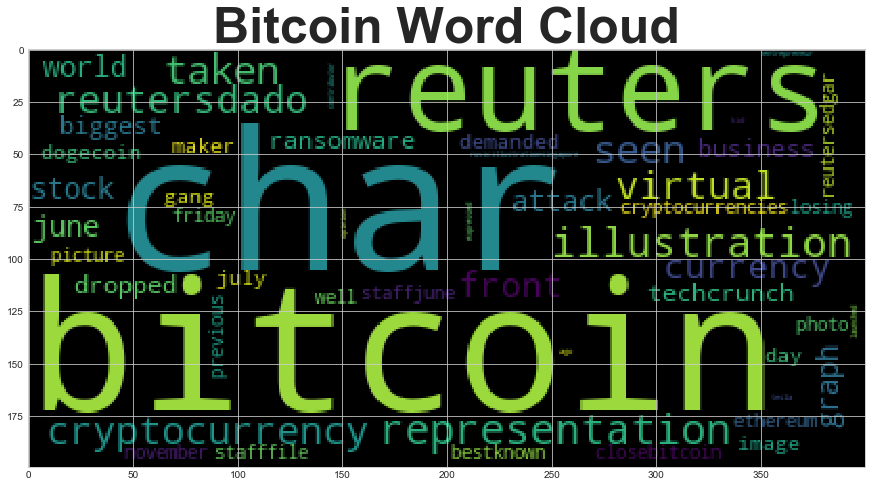

In [66]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

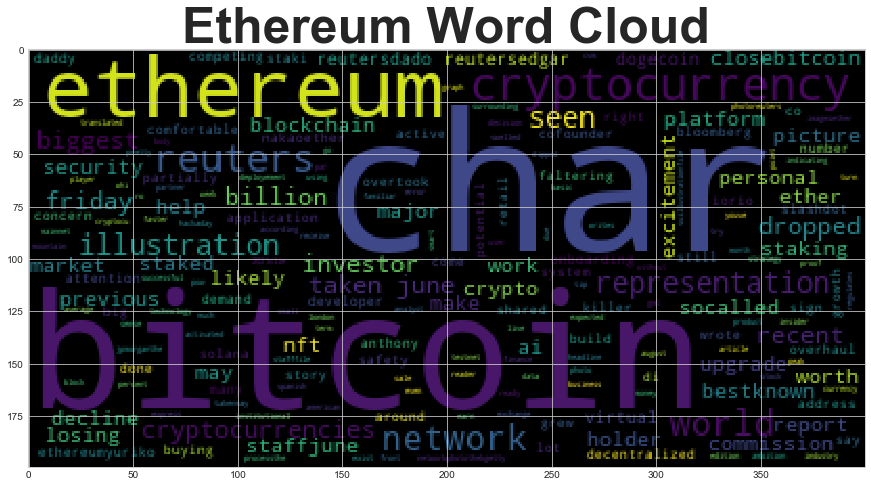

In [67]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [72]:
import spacy
from spacy import displacy
spacy.cli.download("en_core_web_sm")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [73]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [74]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [75]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])


In [76]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"


In [77]:
# Render the visualization
displacy.render(doc, style='ent')


In [78]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
copyrightGetty Images PERSON
$70m MONEY
£50.5m MONEY
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
March 15, 2021 DATE
REUTERS ORG
Dado Ruvic/ PERSON
June 30 DATE
Reuters ORG
June 14, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationJune 25 PERSON
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/Illustration/File Photo PERSON
Reuters ORG
+304 PERSON
James Martin/CNET PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
Reuters ORG
June 25 DATE
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Friday DATE
2,554.88 MONEY
50.5 CARDINAL
May 19, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Reuters ORG
5.17% PERCENT
33 MONEY
Reuters ORG
June

---

### Ethereum NER

In [79]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_sentiment_df['content'])


In [80]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [81]:
# Render the visualization
displacy.render(doc, style='ent')


In [82]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
Yuriko Nakao PERSON
Friday DATE
Anthony Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
$40 billion MONEY
2025 DATE
JPMorgan ORG
NFT ORG
90 percent PERCENT
recent weeks DATE
recent months DATE
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
Reuters ORG
June 25 DATE
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Friday DATE
2,554.88 MONEY
50.5 CARDINAL
Reuters ORG
June 25 DATE
Reuters ORG
8.51% PERCENT
31,699.83 MONEY
22:04 GMT TIME
Friday DATE
2,937.27 MONEY
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/Illustration/File Photo PERSON
Reuters ORG
+304 PERSON
Hackaday DATE
Proof of Work WORK_OF_ART
Bitcoin, Ethereum ORG
May 19, 2021 DATE
REUTERS ORG
Dado Ruvic

---